In [1]:
import numpy as np
import pyzx as zx

ModuleNotFoundError: No module named 'ipywidgets'

In [64]:
qubits=10      #Amount of qubits in circuit.
depth=11       #Depth of circuit.
p_had=0.2      #probability that each gate is a Hadamard gate.
p_t=0.2        #probability that each gate is a T gate (or if clifford is set, S gate).
clifford=False #when set to True, the phase gates are S gates instead of T gates. 

circuit1=zx.generate.CNOT_HAD_PHASE_circuit(qubits=qubits, depth=depth, p_had=p_had, p_t=p_had, clifford=clifford)
zx.draw(circuit1)

In [65]:
qubits=10      #Amount of qubits in circuit.
depth=11       #Depth of circuit.
p_t=0.2        #Probability that each gate is a T-gate.
p_s=0.3        #Probability that each gate is a S-gate.
p_hsh=0.1      #Probability that each gate is a HSH-gate.

p_cnot=0.3     #Probability that each gate is a CNOT-gate.
backend=None   #Whengiven,shouldbeoneofthepossibleBackendsback- ends. 



circuit2=zx.generate.cliffordT(qubits=qubits, depth=depth, p_t=p_t, p_s=p_s, p_hsh=p_hsh, p_cnot=p_cnot, backend=backend)
zx.draw(circuit2)

In [66]:
qubits=10         #Amount of qubits in circuit.
depth=11          #Depth of circuit.
no_hadamard=False #Whether hadamard edges are allowed to be placed.
t_gates=False     #
backend=None      #Whengiven,shouldbeoneofthepossibleBackendsback- ends.

circuit3=zx.generate.cliffords(qubits=qubits, depth=depth, no_hadamard=no_hadamard, t_gates=t_gates, backend=None)
zx.draw(circuit3)

19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
/Users/voicutu/opt/anaconda3/envs/qosf_ment/lib/python3.7/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

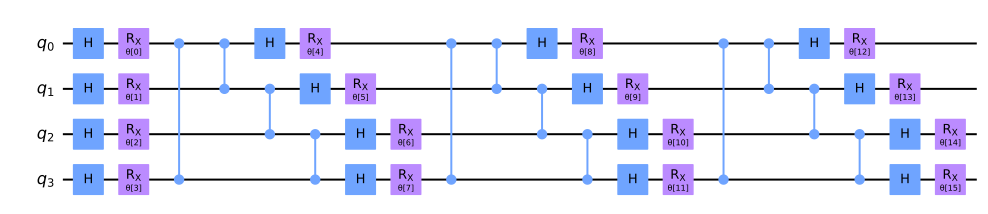

In [85]:
# A method of taking large circuits from qiskit.
#https://github.com/Cryoris/notebooks/blob/master/Circuit%20library%20%26%20native%20circuits.ipynb

from  qiskit.circuit.library import TwoLocal

circuit = TwoLocal(4, ['h', 'rx'], 'cz', entanglement='circular')
circuit.draw('mpl')

In [96]:

qa=circuit.qasm()

def qasm_operation(circ):
    qa=circ
    nr_char=len(qa)
    
    i=0
    while i<nr_char:
        if qa[i]=='θ':
            #print('th',i)
            for j in range(i,nr_char):
                if qa[j]=="]":
                    #print("]",j)
                    break
            #
            qa=qa[:i]+str(np.random.normal(0,1,1)[0]*2*np.pi)+qa[j+1:]
            nr_char=len(qa)
        i=i+1
        
    return qa

circuit4_qasm=qasm_operation(circuit.qasm())
circuit4=zx.qasm(circuit4_qasm)
zx.draw(circuit4)



In [1]:
from handmade_ansatz import *

In [3]:
nr_q=10             # number of qubits
nr_p=3              # nuber of qubits initialize in state 1
initialize=False    #

c=zx.Circuit(qubit_amount=nr_q)
add_ansatz_gzb(c,nr_q,nr_p, initialize=initialize)

zx.draw(c)